<a href="https://colab.research.google.com/github/manishkolla/DSCI-1302/blob/main/Class_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Ananlysis

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
                                              review  \
0  I called you because my food was cold and not ...   
1  OMG, hands down the best pizza I've had from D...   
2  This Domino's has the best pizza delivery and ...   
3   My Sweetheart & I are very pleased to invite you   
4  I called to place an order, The lady answered ...   

                                     Cleaned Reviews  \
0  I called you because my food was cold and not ...   
1  OMG hands down 

([<matplotlib.patches.Wedge at 0x7efeeb08add0>,
 [Text(-0.3708204787324998, 1.1412677917792124, 'Positive'),
  Text(-0.33991852729952715, -1.04616222202798, 'Negative'),
  Text(0.8899188088302002, -0.6465636192133282, 'Neutral')],
 [Text(-0.21631194592729153, 0.6657395452045405, '60.0%'),
  Text(-0.18541010579974207, -0.5706339392879891, '20.0%'),
  Text(0.48541025936192733, -0.3526710650254517, '20.0%')])

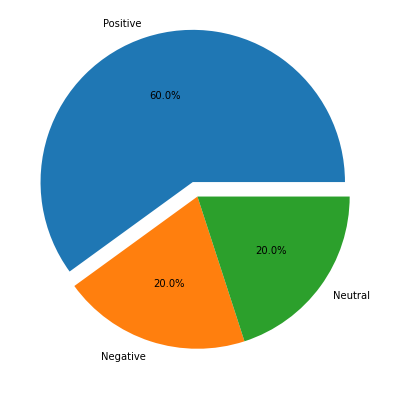

In [ ]:
#importing various python libraries like natural language processing, pandas, and regular expression, and........

import nltk
import pandas as pd
import re
from nltk.tokenize import word_tokenize
import textblob

# Creating a pandas dataframe from reviews.txt file and converting it to csv file and printing the first 5 rows
data = pd.read_csv('reviews.txt', sep='\t')
data.to_csv ('reviews.csv', index=None)
data.head()

#dropping the unnecessary data like the index numbers and printing the first 4 rows
mydata = data.drop("Unnames: 0", axis=1)
mydata.head(4)

# Defining  a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets and returns the text using the regular expression
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column using the above method and printing the rows
mydata['Cleaned Reviews'] = mydata['review'].apply(clean)
mydata.head()


#step 2-4
#using natural language processing and implementing tokenizing, POS tagging, and stop word removal
#tokenizing- Tokenization is the process of breaking the text into smaller pieces called Tokens. 
              #It can be performed at sentences(sentence tokenization) or word level(word tokenization).
#word-level tokenization using nltk tokenize function word_tokenize() 

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
import nltk
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
#Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag).
# POS tagging essential to preserve the context of the word and is essential for Lemmatization.
#it can be done using the nltk post_tag() function
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):  #removing all the stopword in English using the stopword function
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

mydata['POS tagged'] = mydata['Cleaned Reviews'].apply(token_stop_pos)
mydata.head()
print(mydata)

#step 5
#A stem is a part of a word responsible for its lexical meaning. 
#The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
      if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
    else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

mydata['Lemma'] = mydata['POS tagged'].apply(lemmatize)
mydata.head()
mydata[['review', 'Lemma']]

'''
TextBlob is a Python library for processing textual data. 
It provides a consistent API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, and more.
The two measures that are used to analyze the sentiment are:

Polarity – talks about how positive or negative the opinion is
Subjectivity – talks about how subjective the opinion is

'''
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
  return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

#printing only the review and the Lemma columns from the table
fin_data = pd.DataFrame(mydata[['review', 'Lemma']])

# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

tb_counts = fin_data.Analysis.value_counts()
print(tb_counts)

#graph plotting

import matplotlib.pyplot as plt
%matplotlib inline
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

fin_data['Sentiment Analysis'] = mydata['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()

swn_counts= fin_data['Sentiment Analysis'].value_counts()
print(swn_counts)

swn_counts= fin_data['Sentiment Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)